# Mount Google Drive <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUX6O-4BsthBE_xhtLuEN0CNFxzn8RY8DOJvuE-0SzEBcxCNAo7V51BuUDrUGISmMgVWs&usqp=CAU" height="20" width="22" /> to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Mount OneDrive <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Microsoft_Office_OneDrive_%282019%E2%80%93present%29.svg/2560px-Microsoft_Office_OneDrive_%282019%E2%80%93present%29.svg.png" height="17" width="22" /> to Colab



## Install RCLONE <img src="https://biplobsd.github.io/RLabClone/img/title_rclonelab.svg" height="27" width="105" />
https://rclone.org/downloads/

https://github.com/rclone/rclone/releases/tag/v1.60.1

In [ ]:
!python -m pip install --upgrade pip setuptools wheel
# https://colab.research.google.com/github/jakiya99/Torrent-to-Onedrive/blob/main/new_torrents_download_to_onedrive.ipynb#scrollTo=Fil_bHuAD8S3
# https://github.com/jakiyaa/Torrent-to-Onedrive/blob/main/full%20tutorial.md
# https://github.com/jakiyaa/rclone-authenticate

!wget https://downloads.rclone.org/v1.60.1/rclone-v1.60.1-linux-amd64.deb
!apt install ./rclone-v1.60.1-linux-amd64.deb

## config OneDrive

In [ ]:
!rclone config

## RCLONE mount OneDrive

In [ ]:
!mkdir onedrive
# 사용자 shell이 종료되어도 작동되기 위해 nohup(no hang up), & 사용
!nohup rclone --vfs-cache-mode writes mount onedrive: ./onedrive &

nohup: appending output to 'nohup.out'


## Check OneDrvie file

In [ ]:
!ls ./onedrive

 check.py		  OfficeMobile	     '한국어 방언 발화(경상도).zip'
 mimic-recording-studio   ttsdatasetcreator


# Data Processing

## Download Data
<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png?20140912155123" height="30" width="120" />

[**Jejueo Single Speaker Speech Dataset**](https://www.kaggle.com/datasets/bryanpark/jejueo-single-speaker-speech-dataset)


In [ ]:
# !pip install kaggle
!pip show kaggle

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'kkkkkkkiii' # your-kaggle-username
os.environ['KAGGLE_KEY'] = '46a59f1d41b564b8f970325b34aa23ac' # your-kaggle-api-key

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [ ]:
# download kaggle data
api.dataset_download_files('bryanpark/jejueo-single-speaker-speech-dataset', path="./onedrive")

In [ ]:
!ls ./onedrive

 check.py				    OfficeMobile
 jejueo-single-speaker-speech-dataset.zip   ttsdatasetcreator
 jss-dataset				   '한국어 방언 발화(경상도).zip'
 mimic-recording-studio


In [ ]:
# unzip & save data in OneDrive
!mkdir ./onedrive/jss-dataset

!unzip './onedrive/jejueo-single-speaker-speech-dataset.zip' -d ./onedrive/jss-dataset

In [ ]:
!ls ./onedrive/jss-dataset

jss  jss.v.1.0.tsv


In [ ]:
# rename
os.rename('./onedrive/jss-dataset/jss', './onedrive/jss-dataset/wavs')
os.rename('./onedrive/jss-dataset/jss.v.1.0.tsv', './onedrive/jss-dataset/jss.tsv')

!ls ./onedrive/jss-dataset

metadata.tsv  wavs


In [ ]:
import pandas as pd

metadata = pd.read_csv('./onedrive/jss-dataset/metadata.tsv', delimiter='\t', header=None)


print(f'총 문장 개수: {len(metadata)}개')
metadata.head()

총 문장 개수: 10000개


,0,1,2,3
0,jss/0.wav,지금부터 그러면 본격적으로 우리가 도련동에 대해서 조사를 할 거라 예? 이 마을이 ...,77,9.87
1,jss/1.wav,"예, 그건 한 칠백년 전에 이제 그 설촌이 시작이 되었다고 헙니다.",37,5.00
2,jss/2.wav,예. 칠백년 전에 설촌이 뒈엇는데 이제 그루후에 이제 성씨들이 여러 성씨들이 많이 ...,74,11.61
3,jss/3.wav,예. 그러면은 칠백년부터 허는데 설촌할 때 어떤 성씨들이 헷덴 말도 이신가마씨?,44,6.39
4,jss/4.wav,그 다음 양씨. 고씨. 마 대략적으로 요런 순서가 뒘서양.,32,3.90


In [ ]:
# update path
jss_to_wavs = [v.replace('jss', 'wavs') for v in metadata[0].values]
metadata[0] = jss_to_wavs

metadata.head()

,0,1,2,3
0,wavs/0.wav,지금부터 그러면 본격적으로 우리가 도련동에 대해서 조사를 할 거라 예? 이 마을이 ...,77,9.87
1,wavs/1.wav,"예, 그건 한 칠백년 전에 이제 그 설촌이 시작이 되었다고 헙니다.",37,5.00
2,wavs/2.wav,예. 칠백년 전에 설촌이 뒈엇는데 이제 그루후에 이제 성씨들이 여러 성씨들이 많이 ...,74,11.61
3,wavs/3.wav,예. 그러면은 칠백년부터 허는데 설촌할 때 어떤 성씨들이 헷덴 말도 이신가마씨?,44,6.39
4,wavs/4.wav,그 다음 양씨. 고씨. 마 대략적으로 요런 순서가 뒘서양.,32,3.90


In [ ]:
f = open('./onedrive/jss-dataset/metadata.txt', 'w')

for i in range(10000):
  data = metadata.iloc[i, 0] + '|' + metadata.iloc[i, 1] + '\n'
  f.write(data)

f.close()

In [ ]:
f = open('./onedrive/jss-dataset/metadata.txt', 'r')

i = 0
while i < 5:
    line = f.readline()
    i += 1
    print(line)

f.close()

wavs/0.wav|지금부터 그러면 본격적으로 우리가 도련동에 대해서 조사를 할 거라 예? 이 마을이 언제 어떻게 형성뒛덴 헌 말 알아지는 데로 ᄀᆞᆯ아줍서.

wavs/1.wav|예, 그건 한 칠백년 전에 이제 그 설촌이 시작이 되었다고 헙니다.

wavs/2.wav|예. 칠백년 전에 설촌이 뒈엇는데 이제 그루후에 이제 성씨들이 여러 성씨들이 많이 와가지고 현재는 ᄒᆞᆫ 팔십여 성씨. 경 뒈서마씀.

wavs/3.wav|예. 그러면은 칠백년부터 허는데 설촌할 때 어떤 성씨들이 헷덴 말도 이신가마씨?

wavs/4.wav|그 다음 양씨. 고씨. 마 대략적으로 요런 순서가 뒘서양.



In [ ]:
# # remove duplicated (~tmp) wav file
# tmp_wav_list = [os.remove(w) for w in gb.glob('./onedrive/jss-dataset/jss/[~tmp]*.wav')]

import glob as gb

wav_list = [w for w in gb.glob('./onedrive/jss-dataset/wavs/*.wav')]

print(f'총 .wav 파일 개수: {len(wav_list)}개')

총 .wav 파일 개수: 10000개


In [ ]:
import librosa

sample_rate_list = []
for i in range(10000):
  path = f'./onedrive/jss-dataset/jss/{i}.wav'
  sample_rate_list.append(librosa.get_samplerate(path))

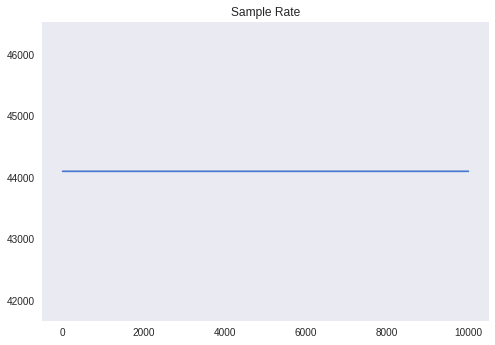

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-muted')
# sample rate of all audio file is 44100
plt.plot(sample_rate_list)
plt.title('Sample Rate');

In [ ]:
duration_list = []

for i in range(10000):
  path = f'./onedrive/jss-dataset/jss/{i}.wav'
  duration_list.append(librosa.get_duration(filename=path))

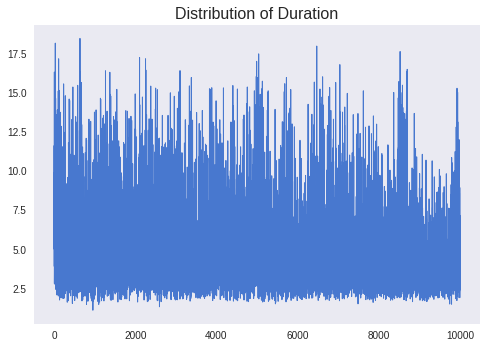

In [ ]:
plt.style.use('seaborn-muted')
plt.plot(duration_list)
plt.title('Distribution of Duration', size=16);

https://tts.readthedocs.io/en/latest/formatting_your_dataset.html#formatting-your-dataset

```
/jss-dataset
      |
      | -> metadata.tcv
      | -> metadata.txt
      | -> /wavs
              | -> 0.wav
              | -> 1.wav
              | ...
```